In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def readsummary(foldername):
    return pd.read_csv(
        f"{foldername}/summary.txt",
        header=None,
        sep=r"\s+",
        names=[
            "step number",
            "age",
            "mass",
            "luminosity",
            "radius",
            "surface temperature",
            "central temperature",
            "central density",
            "central pressure",
            "central electron degeneracy parameter",
            "central hydrogen mass fraction",
            "central helium mass fraction",
            "central carbon mass fraction",
            "central nitrogen mass fraction",
            "central oxygen mass fraction",
            "dynamical timescale",
            "kelvin-helmholtz timescale",
            "nuclear timescale",
            "luminosity from PP chain",
            "luminosity from CNO cycle",
            "luminosity from triple-alpha reactions",
            "luminosity from metal burning",
            "luminosity of neutrino losses",
            "mass of helium core",
            "mass of carbon core",
            "mass of oxygen core",
            "radius of helium core",
            "radius of carbon core",
            "radius of oxygen core",
        ],
    )


def plot_features(
    variable_list,
    variable_names,
    xvalues,
    constant_value=0.02,
    xaxis="mass",
    together_on_one_figure=False,
    xlog=False,
    ylog=False,
    more_folders=False,
):
    if xaxis == "mass":
        xlabel = r"mass [$M_\mathrm{Sun}$]"
        print(f"Generating plots for constant metallicity {constant_value}")
    elif xaxis == "metallicity":
        xlabel = "metallicity"
        print(f"Generating plots for constant mass {constant_value}")
    elif xaxis == "age":
        xlabel = "age [Mljn yrs?]"
    else:
        print("wdymmm")
    if constant_value < 1:
        constant_value = str(constant_value).replace(".", "")
    print(constant_value)
    if together_on_one_figure == True:
        if more_folders == False:
            for k, feature in enumerate(variable_list):
                # plt.figure(figsize=(8, 5), dpi=150)
                plt.plot(
                    xvalues,
                    feature,
                    label=f"{variable_names[k]} with constant value {constant_value}",
                )
                plt.xlabel(xlabel)
                # plt.ylabel(variable_names[k])
            if xlog == True:
                plt.xscale("log")
            if ylog == True:
                plt.yscale("log")
            plt.legend()
            result = "_".join(variable_names)
            plt.savefig(f"x_{xaxis}_y_{result}_constant_{constant_value}")
            plt.show()
        else:
            for folder in range(len(variable_list[0, 0])):
                for k, feature in enumerate(variable_list[:, :, folder]):
                    # plt.figure(figsize=(8, 5), dpi=150)
                    plt.plot(
                        xvalues,
                        feature,
                        label=f"{variable_names[k]} with constant value {more_folders[folder]}",
                    )
                    plt.xlabel(xlabel)
                    # plt.ylabel(variable_names[k])
                if xlog == True:
                    plt.xscale("log")
                if ylog == True:
                    plt.yscale("log")
                result = "_".join(variable_names)
            plt.legend()
            plt.savefig(f"x_{xaxis}_y_{result}_constant_{constant_value}")
            plt.show()
    else:
        if more_folders == False:
            for k, feature in enumerate(variable_list):
                # plt.figure(figsize=(8, 5), dpi=150)
                plt.scatter(
                    xvalues,
                    feature,
                    label=f"{variable_names[k]} with constant value {constant_value}",
                )
                plt.xlabel(xlabel)
                plt.ylabel(variable_names[k])
                if xlog == True:
                    plt.xscale("log")
                if ylog == True:
                    plt.yscale("log")
                plt.legend()
                plt.savefig(f"x_{xaxis}_y_{variable_names[k]}_constant_{constant_value}")
                plt.show()
        else:
            for k, feature in enumerate(variable_list):
                for folder in range(len(variable_list[0, 0])):
                    # plt.figure(figsize=(8, 5), dpi=150)
                    plt.scatter(
                        xvalues,
                        feature[:, folder],
                        label=f"{variable_names[k]} with constant value {more_folders[folder]}",
                    )
                    plt.xlabel(xlabel)
                    plt.ylabel(variable_names[k])
                if xlog == True:
                    plt.xscale("log")
                if ylog == True:
                    plt.yscale("log")
                plt.legend()
                plt.savefig(f"x_{xaxis}_y_{variable_names[k]}_constant_{constant_value}")
                plt.show()


def get_summary_data(variable_names, foldername, iteration=1):
    variables = np.zeros(len(variable_names))
    df = readsummary(foldername)
    return [df[variable][iteration] for variable in variable_names]


def get_iteration_from_age(age, foldername):
    ages = readsummary(f"Data ex2/{foldername}")["age"]
    closest_index = min(range(len(ages)), key=lambda i: abs(ages[i] - age))
    return closest_index


def get_data_for_more_folders(
    variable_names,
    foldernames,
    iteration=1,
    xaxis="mass",
    plot=True,
    xlog=False,
    ylog=False,
    together_on_one_figure=False,
    nr_of_folders=1,
    age=None,
):  # mass must always be the last of the variable names
    if nr_of_folders == 1:
        data = np.zeros((len(foldernames), len(variable_names)))

        for k, foldername in enumerate(foldernames):
            if iteration == None:
                iteration = get_iteration_from_age(age, foldername)
                print(iteration)
            variables = get_summary_data(variable_names, f"Data ex2/{foldername}", iteration)
            data[k] = variables

        if xaxis == "mass":
            xvalues = data[:, -1]
            constant_value = 0.02  # metallicity

        elif xaxis == "metallicity":
            xvalues = np.array([0.0001, 0.0003, 0.001, 0.004, 0.01, 0.02, 0.03])  # metallicities
            constant_value = round(
                data[
                    1,
                    -1,
                ]
            )

        if plot == True:
            plot_features(
                data[:, :-1].T,
                variable_names[:-1],
                xvalues,
                constant_value,
                xaxis,
                together_on_one_figure,
                xlog,
                ylog,
            )

        return data

    else:
        data = np.zeros((len(nr_of_folders), len(foldernames[0]), len(variable_names)))

        for i in range(len(nr_of_folders)):
            for k, foldername in enumerate(foldernames[i]):
                variables = get_summary_data(variable_names, f"Data ex2/{foldername}", iteration)
                data[i, k] = variables

            if xaxis == "mass":
                xvalues = data[:, -1]
                constant_value = 0.02  # metallicity

            elif xaxis == "metallicity":
                xvalues = np.array(
                    [0.0001, 0.0003, 0.001, 0.004, 0.01, 0.02, 0.03]
                )  # metallicities
                constant_value = round(data[0, 1, -1])

        if plot == True:
            plt.figure()
            plot_features(
                data[:, :, :-1].T,
                variable_names[:-1],
                xvalues,
                constant_value,
                xaxis,
                together_on_one_figure,
                xlog,
                ylog,
                more_folders=nr_of_folders,
            )
            plt.show()
        return data

Generating plots for constant metallicity 0.02
002


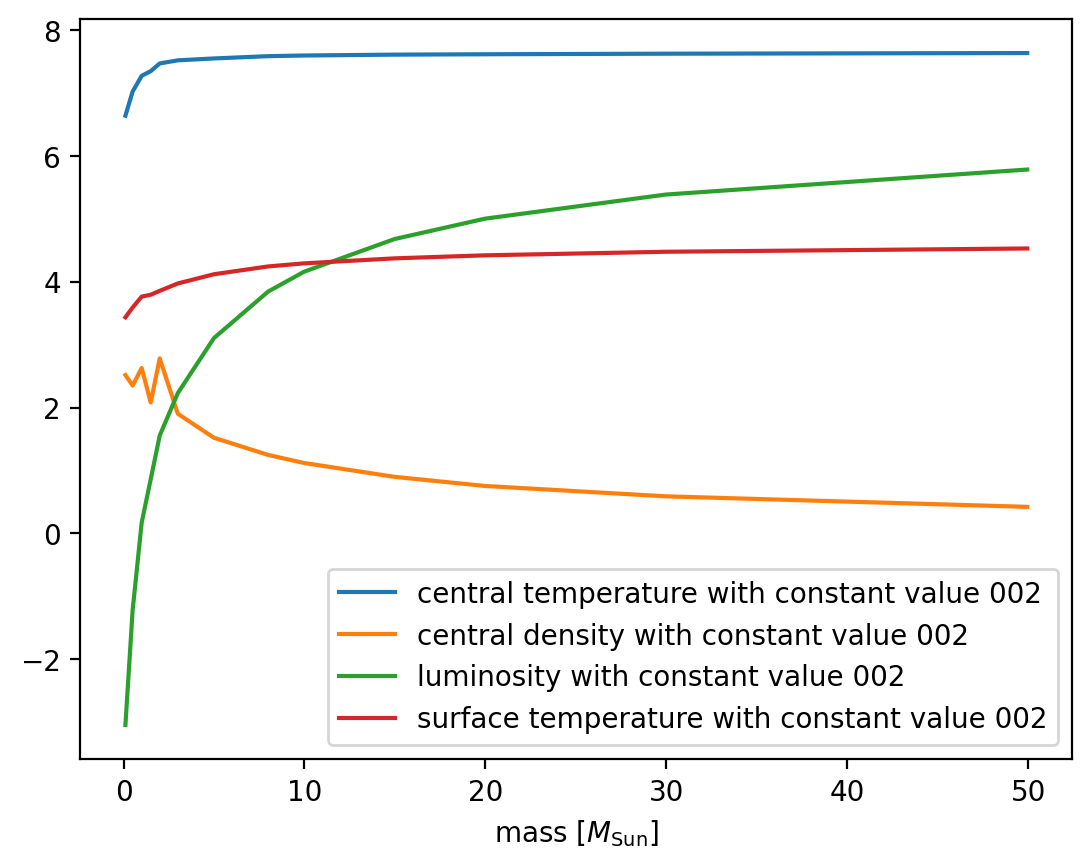

Generating plots for constant mass 8
8


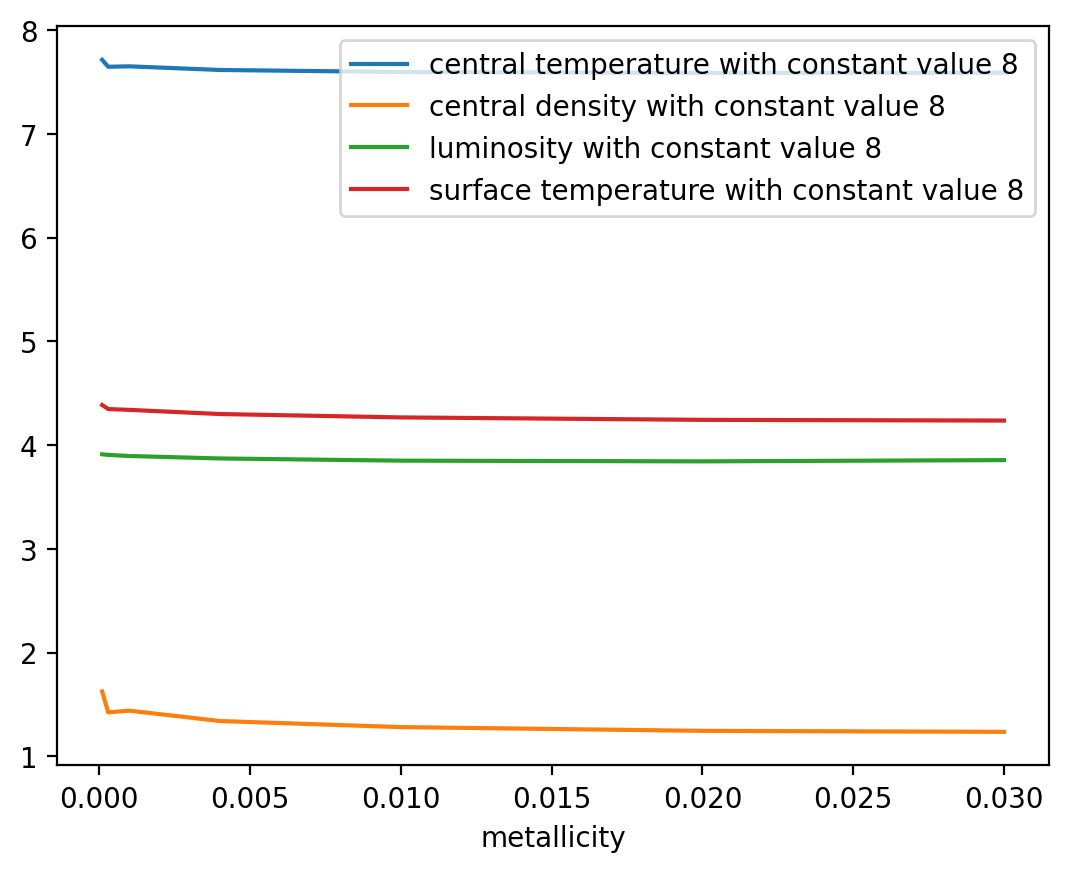

Generating plots for constant mass 100
100


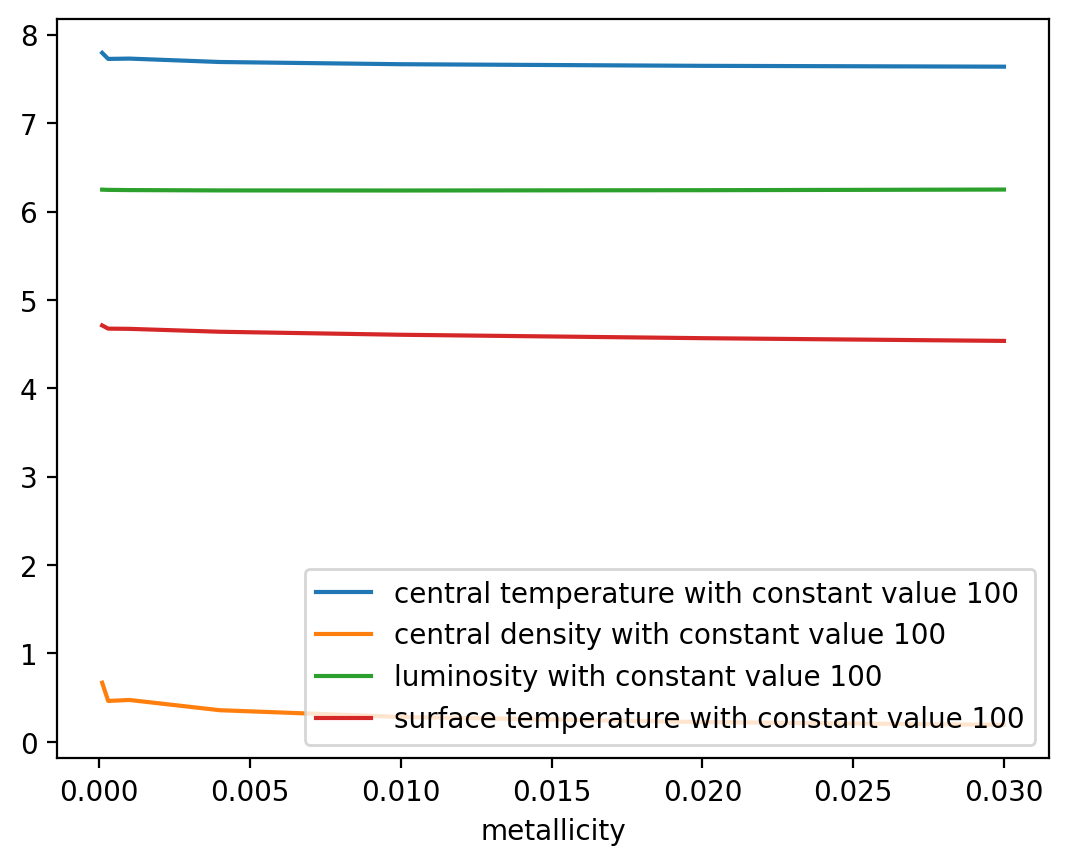

In [3]:
massfoldernames = [
    "mass01",
    "mass05",
    "mass10",
    "mass15",
    "mass20",
    "mass30",
    "mass50",
    "mass80",
    "mass100",
    "mass150",
    "mass200",
    "mass300",
    "mass500",
]
met8foldernames = [
    "mass_8_metallicity_0001",
    "mass_8_metallicity_0003",
    "mass_8_metallicity_001",
    "mass_8_metallicity_004",
    "mass_8_metallicity_01",
    "mass_8_metallicity_02",
    "mass_8_metallicity_03",
]
met100foldernames = [
    "mass_100_metallicity_0001",
    "mass_100_metallicity_0003",
    "mass_100_metallicity_001",
    "mass_100_metallicity_004",
    "mass_100_metallicity_01",
    "mass_100_metallicity_02",
    "mass_100_metallicity_03",
]

variables = ["central temperature", "central density", "luminosity", "surface temperature", "mass"]
all_data = []
for foldernames in [massfoldernames, met8foldernames, met100foldernames]:
    if foldernames == massfoldernames:
        data = get_data_for_more_folders(
            variables, foldernames, iteration=100, together_on_one_figure=True
        )
        all_data.append(data)
    else:
        data = get_data_for_more_folders(
            variables, foldernames, iteration=100, xaxis="metallicity", together_on_one_figure=True
        )
        all_data.append(data)

Generating plots for constant mass 8
8


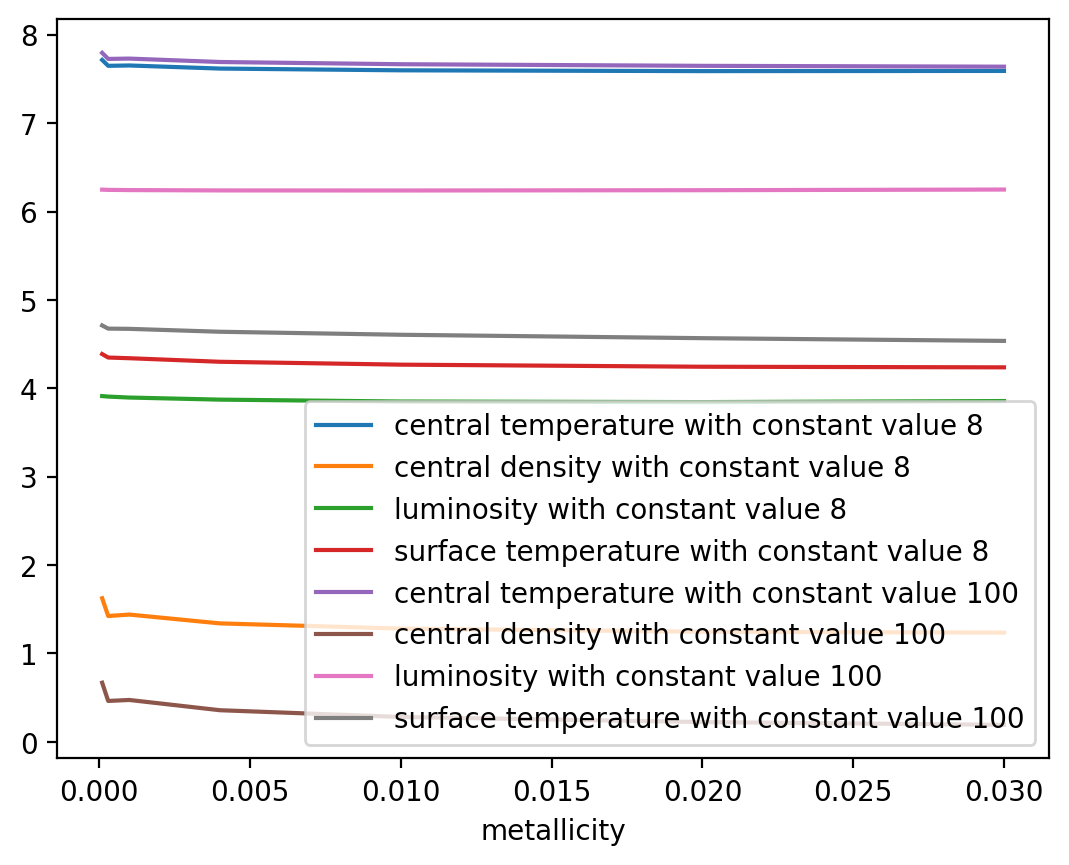

In [4]:
data = get_data_for_more_folders(
    variables,
    [met8foldernames, met100foldernames],
    iteration=100,
    xaxis="metallicity",
    together_on_one_figure=True,
    nr_of_folders=[8, 100],
)

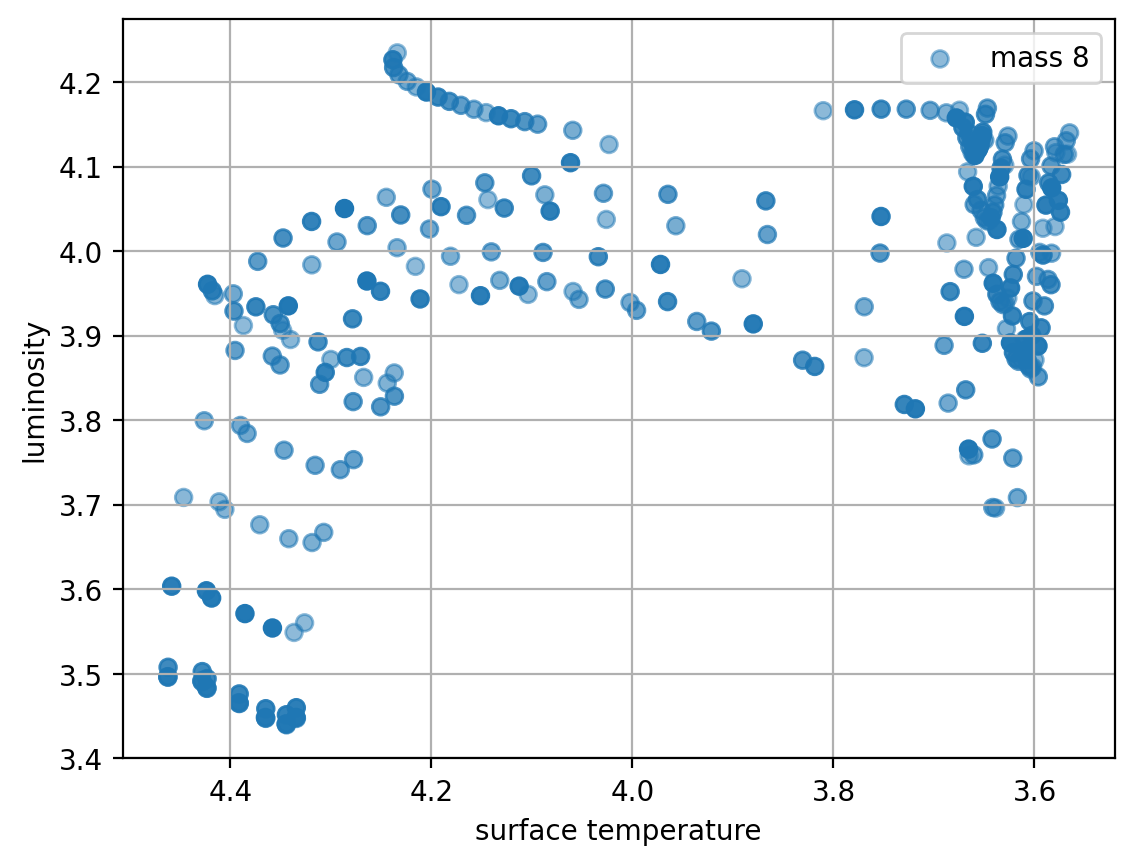

In [ ]:
surface_temperatures = [all_data[i][:, 3] for i in range(3)]
luminosities = [all_data[i][:, 2] for i in range(3)]

S_T_0 = [surface_temperatures[0]]
S_T_1 = [surface_temperatures[1]]
S_T_2 = [surface_temperatures[2]]
L_0 = [luminosities[0]]
L_1 = [luminosities[1]]
L_2 = [luminosities[2]]

ages = [2 * 10**7, 4 * 10**7]
ages = np.linspace(1, 520, 40)

for it in ages:
    it = int(it)
    HR_data = []
    for foldernames in [massfoldernames, met8foldernames, met100foldernames]:
        if foldernames == massfoldernames:
            data = get_data_for_more_folders(
                variables,
                foldernames,
                iteration=it,
                together_on_one_figure=True,
                plot=False,
                age=None,
            )
            HR_data.append(data)
        else:
            data = get_data_for_more_folders(
                variables,
                foldernames,
                iteration=it,
                xaxis="metallicity",
                together_on_one_figure=True,
                plot=False,
                age=None,
            )
            HR_data.append(data)

    surface_temperatures = [HR_data[i][:, 3] for i in range(3)]
    luminosities = [HR_data[i][:, 2] for i in range(3)]
    S_T_0.append(surface_temperatures[0])
    L_0.append(luminosities[0])
    S_T_1.append(surface_temperatures[1])
    L_1.append(luminosities[1])
    S_T_2.append(surface_temperatures[2])
    L_2.append(luminosities[2])

#  plt.plot(S_T_0, L_0, label="metallicity 0.02")
plt.plot(S_T_1, L_1, label="mass 8", lw=1)
#  plt.scatter(S_T_2, L_2, label="mass 100")

plt.gca().invert_xaxis()
plt.grid()
plt.legend()

plt.xlabel("surface temperature")
plt.ylabel("luminosity")
plt.savefig("HRdiagram")
plt.show()

In [ ]:
for i in range(1):
    print("hello")

hello
